**Goals:**


1.   Predict the high booking area using an Unsupervised algorithm and use        some map function to display the data
2.   Predict the price  for those high booking area using supervised algorithm



In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import folium

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/datasets/rideshare_kaggle.csv')
# download this dataset from : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

#Data Pre-processing

In [ ]:
data.shape

(693071, 57)

its a very big dataset!!!

In [ ]:
data[10:20]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
10,9043bf77-1d45-4a93-9520-a083e0277f16,1.543594e+09,16,30,11,2018-11-30 16:13:03,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600
11,d859ec69-b3ff-4af8-9abd-441e31430c94,1.543433e+09,19,28,11,2018-11-28 19:23:07,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800
12,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
13,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
14,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
15,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
16,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
17,e219e545-a006-4936-a6cc-7d00adf0e418,1.543519e+09,19,29,11,2018-11-29 19:18:00,America/New_York,North End,West End,Uber,...,0.0000,1543510800,35.35,1543550400,44.61,1543510800,31.14,1543550400,38.21,1543510800
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,...,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
19,18d580ac-c91a-4b6d-aa75-ab62566f713e,1.544941e+09,6,16,12,2018-12-16 06:15:11,America/New_York,North Station,Haymarket Square,Lyft,...,0.1246,1544979600,38.94,1544954400,43.78,1544990400,33.76,1545019200,38.39,1544986800


In [ ]:
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [ ]:
data[data.duplicated()] #checking for duplicate rows

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


**No duplicate records found**

In [ ]:
data.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

*There are lots of null values in prices column. I tested the model by interpolating the null values with the  mean price, median price and also by dropping the null values. I found out that the error is less when mean value is used to interpolate, so I am going with mean value.*

In [ ]:
# Interpolate missing values to the mean

data['price'].fillna(data['price'].mean(), inplace=True)

In [ ]:
# Interpolate missing values to the median
#data['price'].fillna(data['price'].median(), inplace=True)

In [ ]:
#drop all the null values
#data.dropna(inplace=True)

In [ ]:
data['price'].isna().sum()

0

In [ ]:
data['price']

0          5.000000
1         11.000000
2          7.000000
3         26.000000
4          9.000000
            ...    
693066    13.000000
693067     9.500000
693068    16.545125
693069    27.000000
693070    10.000000
Name: price, Length: 693071, dtype: float64

# Unsupervised Algorithm (K-means Clustering)

In [ ]:
#Preprocess the data for clustering

clustering_data = data[['latitude', 'longitude']].copy()

In [ ]:
#  Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

In [ ]:
#Choose the number of clusters
num_clusters = 5

In [ ]:
#Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Analyze the clusters
data['cluster_label'] = cluster_labels

# Visualization for k-means clustering (high booking area)

In [ ]:

from folium.plugins import MarkerCluster

# Create a map centered around the average latitude and longitude
map_center = [data['latitude'].mean(), data['longitude'].mean()]
map_clusters = folium.Map(location=map_center, zoom_start=11, width='80%', height='80%')

# Create a marker cluster group
marker_cluster = MarkerCluster().add_to(map_clusters)

# Iterate over the clusters and add markers to the marker cluster group
for cluster_label in range(num_clusters):
    cluster_data = data[data['cluster_label'] == cluster_label]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]
    cluster_size = len(cluster_data)
    
    # Create a marker for the cluster center with the number of bookings as the label
    folium.Marker(cluster_center, icon=folium.Icon(color='blue', icon='info-sign'),
                  popup=f"Bookings: {cluster_size}").add_to(marker_cluster)

# Display the map with cluster markers
display(map_clusters)


**You can scroll,zoom-in and zoom-out this map. Once zoomed-out at a greater level, you can see a green cluster above boston city with number of clusters being shown as the areas with high bookings. Zoom-in to have a look at individual clusters. Click on info-sign(i) button to know the number of bookings in that area**

**Note: this particular visualisation (folium -maps function) requires heavy computing and may not display in some computers **So, I plotted the clusters in latitude vs longitude**

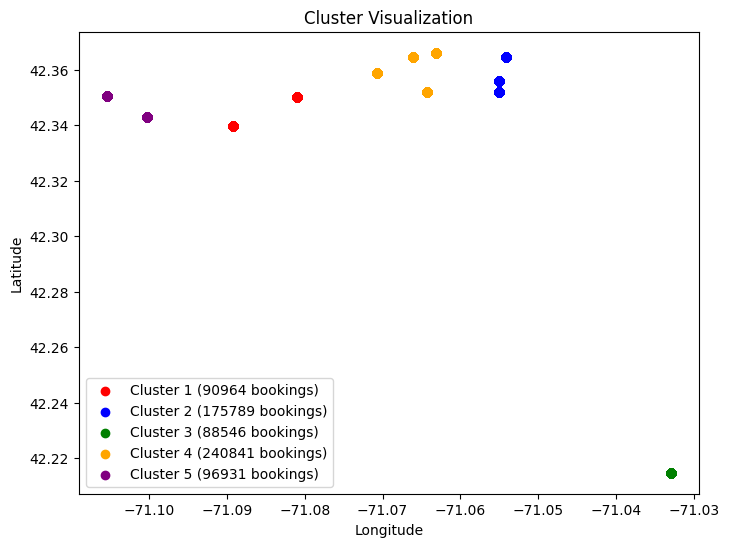

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of bookings within each cluster
cluster_counts = data['cluster_label'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']

for label in range(num_clusters):
    cluster_data = data[data['cluster_label'] == label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], color=colors[label],
                label=f'Cluster {label + 1} ({cluster_counts[label]} bookings)')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization')
plt.legend()
plt.show()


#Supervised Alogorithm (Linear regression) for price prediction

In [ ]:
#Preprocess the data for regression
regression_data = data[['hour', 'day', 'month', 'temperature', 'price']].copy()

**Note:** we are not using *latitude* and *longitude* here because, it is too complex for a human to input correct co-ordinates with respect to the place. Boston is a small part of earth and any incoorect entry may influence the model greatly.

In [ ]:
#Split the data into training and testing sets
train_data = regression_data.sample(frac=0.8, random_state=42)
test_data = regression_data.drop(train_data.index)

In [ ]:
#Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(train_data.drop('price', axis=1), train_data['price'])


LinearRegression()

In [ ]:
#Evaluate the model for efficiency
mse = mean_squared_error(test_data['price'], regression_model.predict(test_data.drop('price', axis=1)))
r_squared = regression_model.score(test_data.drop('price', axis=1), test_data['price'])
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 80.78161002249139
R-squared: -0.00011912374214073651


In [ ]:
#Predict prices for new locations
new_location = pd.DataFrame([[16, 30, 11, 28.64, None]], columns=['hour', 'day', 'month', 'temperature', 'price'])
predicted_price = regression_model.predict(new_location.drop('price', axis=1))
print(f"Predicted Price: {predicted_price[0]}")


Predicted Price: 16.50530645012299


**Note:** we are not using *latitude* and *longitude* here because, it is too complex for a human to input correct co-ordinates with respect to the place. Boston is a small part of earth and any incoorect entry may influence the model greatly.

In [ ]:

#Take input from the user
hour = int(input("Enter the hour of the day (24 hour format)): "))
day = int(input("Enter the day (1-31) : "))
month = int(input("Enter the month (1-12): "))
temperature = float(input("Enter the temperature (in celsius): "))

# Create a DataFrame with the user input
new_location = pd.DataFrame([[hour, day, month, temperature, None]], columns=['hour', 'day', 'month', 'temperature', 'price'])

# Step 2: Predict the price using the regression model
predicted_price = regression_model.predict(new_location.drop('price', axis=1))

# Step 3: Display the predicted price
print('*'*35)
print('*'*30)
print(f"Predicted Price: {predicted_price[0]}")
print('*'*30)
print('*'*35)

Enter the hour of the day (24 hour format)): 12
Enter the day (1-31) : 14
Enter the month (1-12): 3
Enter the temperature (in celsius): 30
***********************************
******************************
Predicted Price: 16.462660755127338
******************************
***********************************
